<h1>Q1: An analysis on Average Order Value (AOV) </h1>

In this notebook, we will explore a method better method for average order value (AOV) as the current AOV is subjected to outliers in our data. The findings of this notebook suggests that we should reconsider AOV to include special base-cases that cover outliers that greatly effect our data.

I will be using the "2019 Winter Data Science Intern Challenge" dataset to perform exploratory data analysis to find a better means of communicating the AOV to consumers.

<h2> Import and cleaning Data </h2>

In [ ]:
install.packages("tidyverse")
install.packages("gsheet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(gsheet)

<h2> Loading the Dataset </h2>
Loading the csv from the 2019 Winter Data Science Intern Challenge Dataset as a dataframe.


To improve overall sharability of this jupyter notebook, I decided to use Googles API to obtain our csv

In [ ]:
csv_url <- 'https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0'
shopify_df <- gsheet2tbl(csv_url)

In [ ]:
head(shopify_df)
tail(shopify_df)

order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 4:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 4:35:11
6,58,882,138,1,credit_card,2017-03-14 15:25:01


order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
4995,12,954,201,1,cash,2017-03-22 0:38:11
4996,73,993,330,2,debit,2017-03-30 13:47:17
4997,48,789,234,2,cash,2017-03-16 20:36:16
4998,56,867,351,3,cash,2017-03-19 5:42:42
4999,60,825,354,2,credit_card,2017-03-16 14:51:18
5000,44,734,288,2,debit,2017-03-18 15:48:18


<h2> Exploratory Analysis </h2>

Before we analyze AOV, we will explore and characterize the raw Shopify data frame. This will give us insight into what we should factors we should investigate.

In [ ]:
#the time duration of the entire data frame
time_dur <- with(shopify_df, difftime(max(created_at), min(created_at)))
time_dur

Time difference of 29.40753 days

We see that the data frame represents data over a span of 29 days.

In [ ]:
#The average order price
max_items_purchased <- max(shopify_df$total_items)
average_item <- mean(shopify_df$order_amount)
sprintf('The average order price is $%s USD', average_item)

[1] "The average order price is $3145.128 USD"

The average of all observations of \$total_items is \$3145.13. This is a naive calculation of the average order value (AOV) is as we expect each shoe to be relatively affordable. As a rough direction for our exploratory analysis, we will attempt to see if any factors are causing the AOV to be high 

<h2> Visualization of the Features </h2>



we will visualize the total_items variable from our data frame as a bar graph. As the average order value is dependent on the item purchase, this is a good starting point to see any underlying characteristics

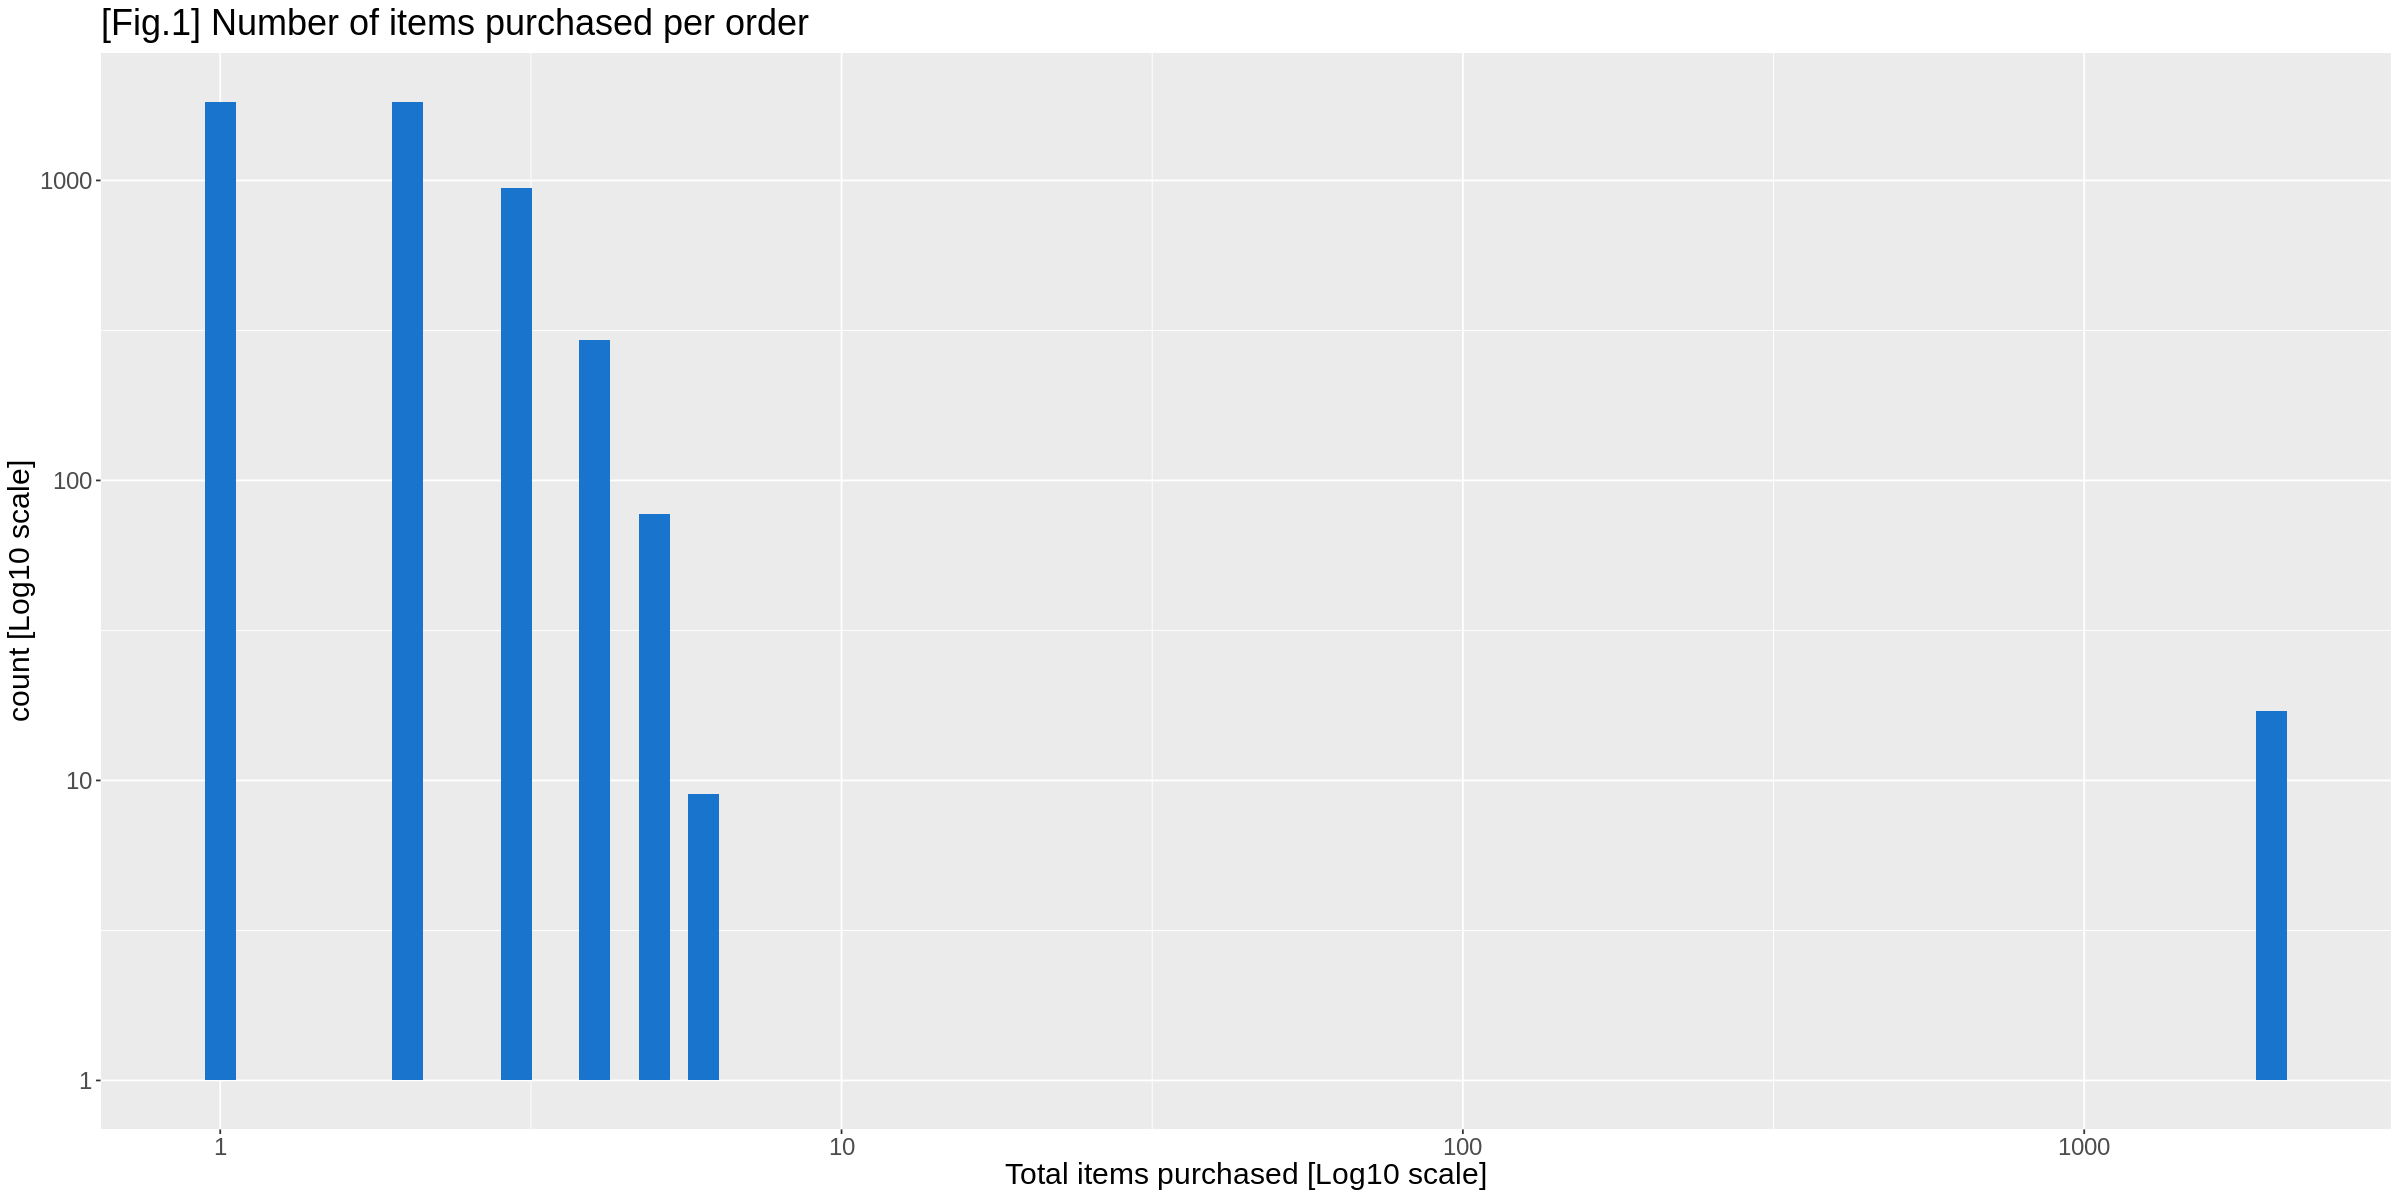

In [ ]:
#plotting the total items per order to see if there are any 
#characteristics of the data
total_items_plot <- shopify_df %>%
  ggplot(aes(x = total_items)) +
  geom_bar(fill = "dodgerblue3", width = 0.05) + 
   scale_x_continuous(trans='log10') +
   scale_y_continuous(trans='log10') +
   labs(x = "Total items purchased [Log10 scale]",
        y = "count [Log10 scale]",
        title = "[Fig.1] Number of items purchased per order") +
   theme(text = element_text(size = 18))
total_items_plot

To improve the effectiveness of the plot and display important features Log-Log scale was chosen for the plot. This was chosen as previous iterations of the graphs showed a significant difference between the categorical bins of Total items purchased and the count of these purchases.


The shape of the barplot above is skewed to the right, suggesting that there are outliers within our data. (indicated by the total purchases with 2000 items on the right of the graph). 

Because of the outliers within our data [Fig.1], an option is to calculate the average order value as a median rather than the mean. The median is a better option to accurately describe the AOV as the median portrays the majority trend of the whole data set; the median is less susceptible to outliers.

After calculating the mean and median, the median is more in line with what we instinctively expected:

In [ ]:
#calculating the mean and median to show the distinction in values
mean_price <- mean(shopify_df$order_amount)
median_price <- median(shopify_df$order_amount)
sprintf("Mean value is: $%s USD", mean_price)
sprintf("Median value is: $%s USD", median_price)

[1] "Mean value is: $3145.128 USD"

[1] "Median value is: $284 USD"

We see that the median is significantly closer to what we expect the AOV to be. This gives us insight into a direction in formulating an average order value that accounts for outliers. However, although the median represents the data set, fundamentally, the mean is an arithmetic average. In contrast, the mean is the observation at the center of the distribution, and therefore different. An alternative value suits the premise of an average order value and is fundamentally closer to the definition of a mean.

As we see in [FIG2], a few shops with significantly more significant order amounts than the rest of the 100 stores. To calculate an average representative of the majority, I will proceed to calculate the average with respect to the interquartile range (IQR). The interquartile range is a range that encompasses the majority of the sales. This is the interquartile mean.


In [ ]:
#filtering the dataframe such that the order amount it incased to observations 
#between the 1st and 3rd quartile
quantile_upper = as.integer(unname(quantile(shopify_df$order_amount, 0.75)))
quantile_lower = as.integer(unname(quantile(shopify_df$order_amount, 0.25)))
shopify_df_no_outliers <- shopify_df %>%
  filter(order_amount < quantile_upper) %>%
  filter(order_amount > quantile_lower)

#calculating the mean of the cleaned data
aov <- mean(shopify_df_no_outliers$order_amount)
sprintf("The IQR mean is %s.", aov)

[1] "The IQR mean is 275.412892696858."

Warning message:
“Ignoring unknown parameters: outlier.shaper”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Removed 958 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 958 rows containing missing values (geom_point).”


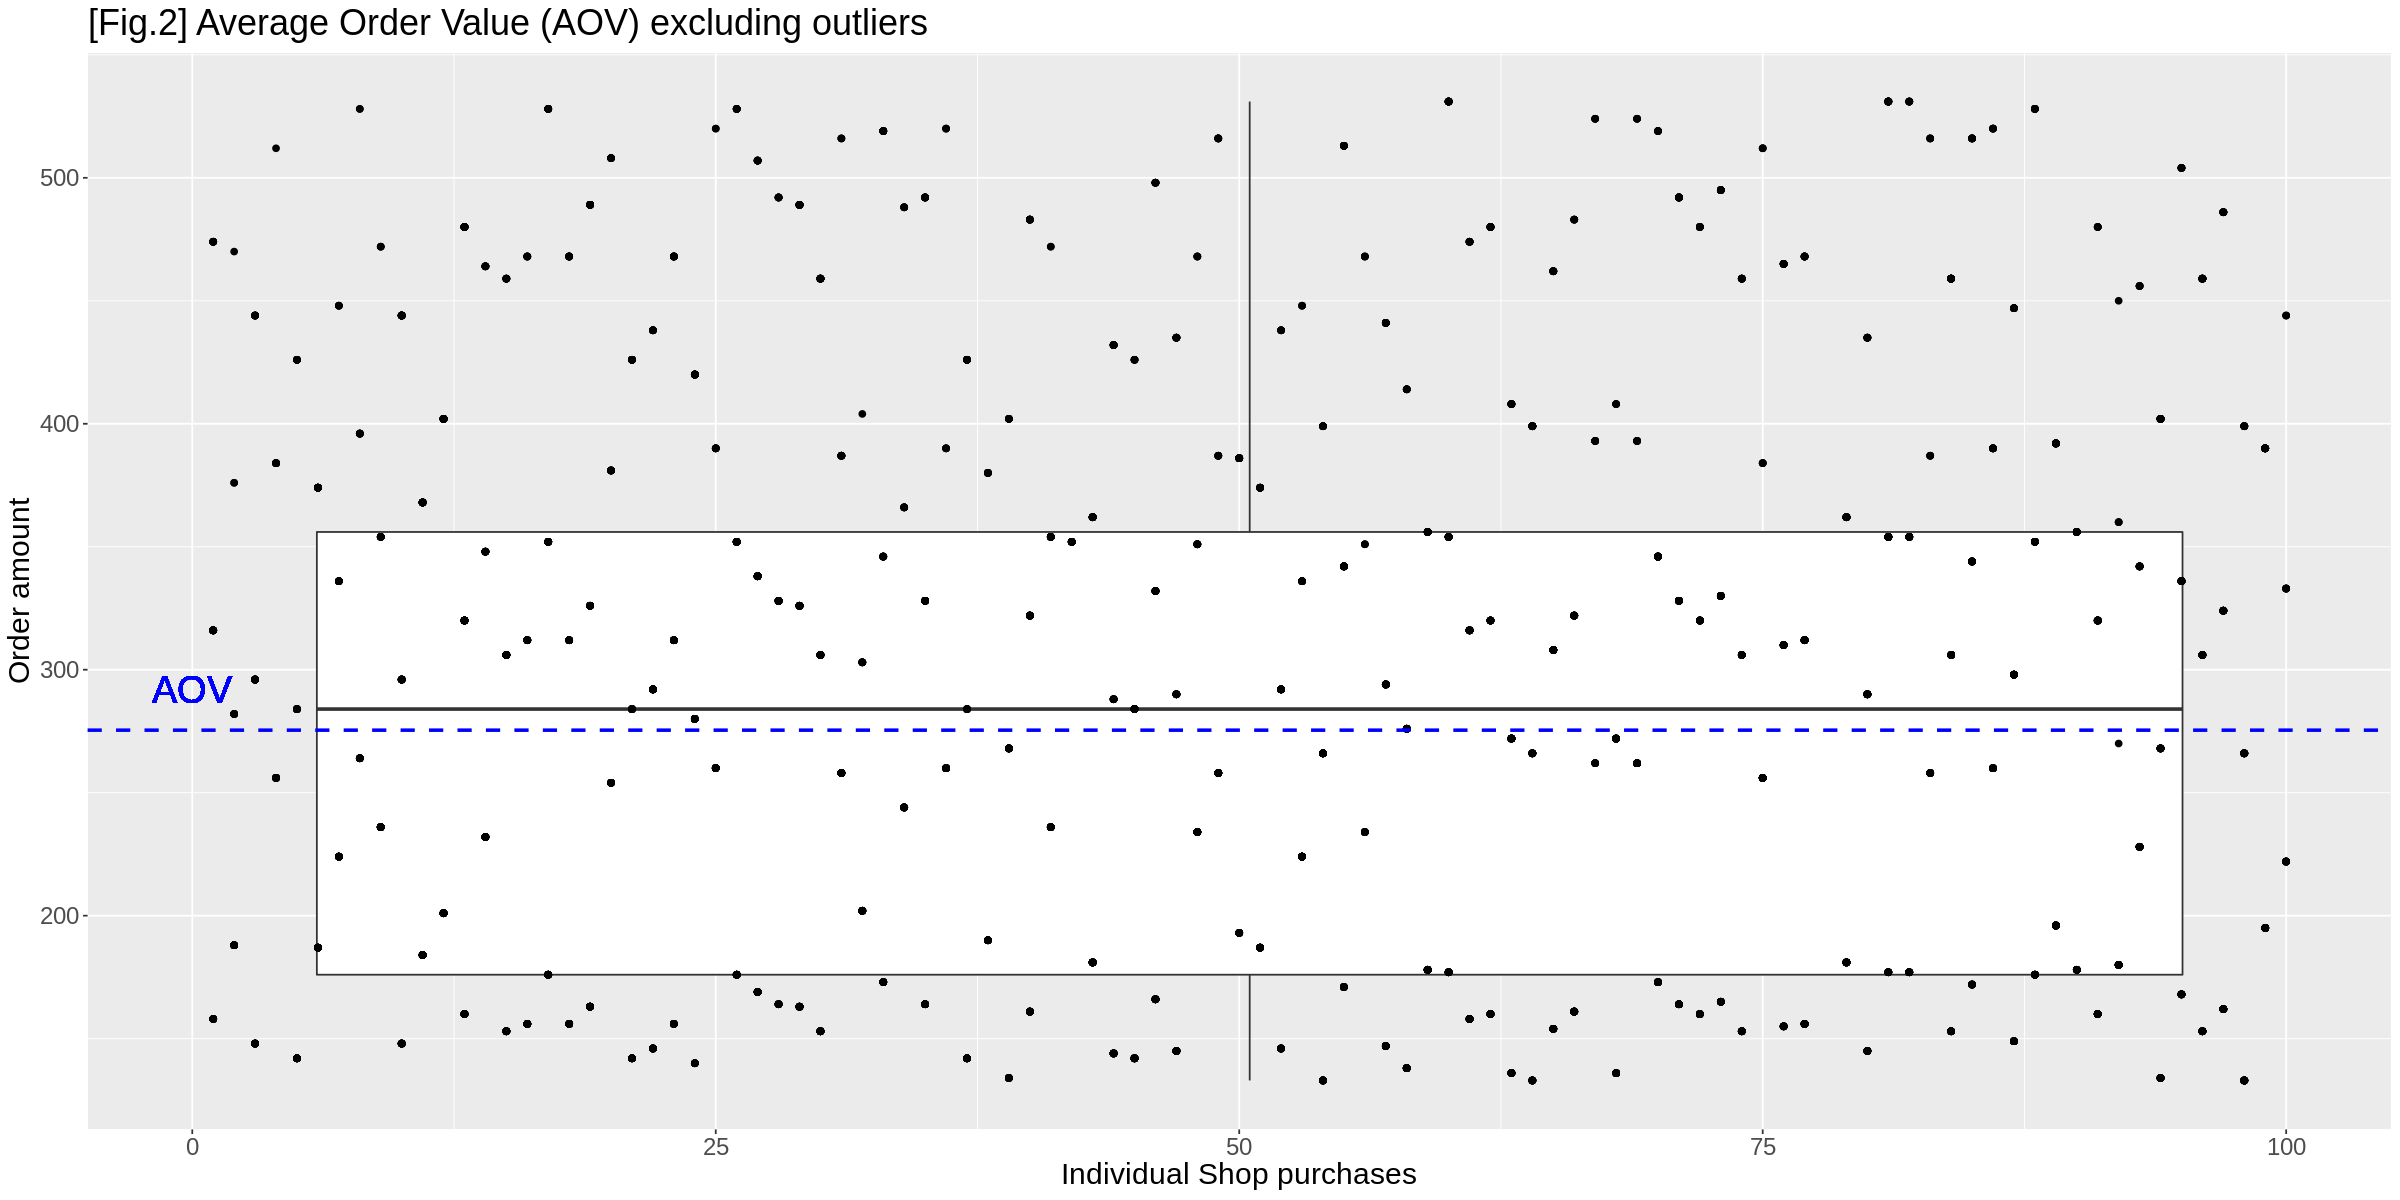

In [ ]:
#Visualizing the average order value of values within the Inter Quartile Range

barplot_aov <- ggplot(shopify_df, aes(x = shop_id, y = order_amount)) +
  geom_boxplot(outlier.shaper = NA) +
  geom_point() +
  geom_hline(yintercept = aov, 
    linetype = "dashed", size = 1.0, colour="blue") +
  geom_text(aes(0,aov,label = "AOV", vjust = -1), size = 8, colour="blue") +
  scale_y_continuous(limits=quantile(shopify_df$order_amount, c(0.1, 0.9))) +
  labs(y = "Order amount", 
    x = "Individual Shop purchases", 
    title = "[Fig.2] Average Order Value (AOV) excluding outliers") + 
  theme(text = element_text(size = 18))
barplot_aov

<h2> ANSWER 1A </h2>

**We see that the interquartile mean is a better average that represents the majority of the data set. Therefore I propose using an interquartile mean as the average order value.**

<h2> Metrics </h2>


<h2> ANSWER 1B </h2>

We want to provide an insightful metric and encapsulate the entire dataset as much as possible. Using features of the dataset, I will use the **customer lifetime value metric**. This metric is dependent on the average order value, average purchase frequency, and lifecycle of the customer. This metric successfully aggregates many features of our dataset. However, from a bigger perspective, the CLV metric also encourages shop owners to think about multiple features beyond the average purchase price. CLV can also suggest that frequency of purchase and duration of purchases are equally essential features to consider.



In [ ]:
#Creating a new dataframe that counts the number of purchases individual 
#customers make within the month
user_loyalty_per_month <- shopify_df %>%
  count(user_id) %>%
  rename(purchases_per_month = n)
head(arrange(user_loyalty_per_month, purchases_per_month))
tail(arrange(user_loyalty_per_month, purchases_per_month))

user_id,purchases_per_month
<dbl>,<int>
717,7
750,7
719,9
812,9
902,9
955,9


user_id,purchases_per_month
<dbl>,<int>
786,25
787,25
791,26
847,26
868,27
718,28


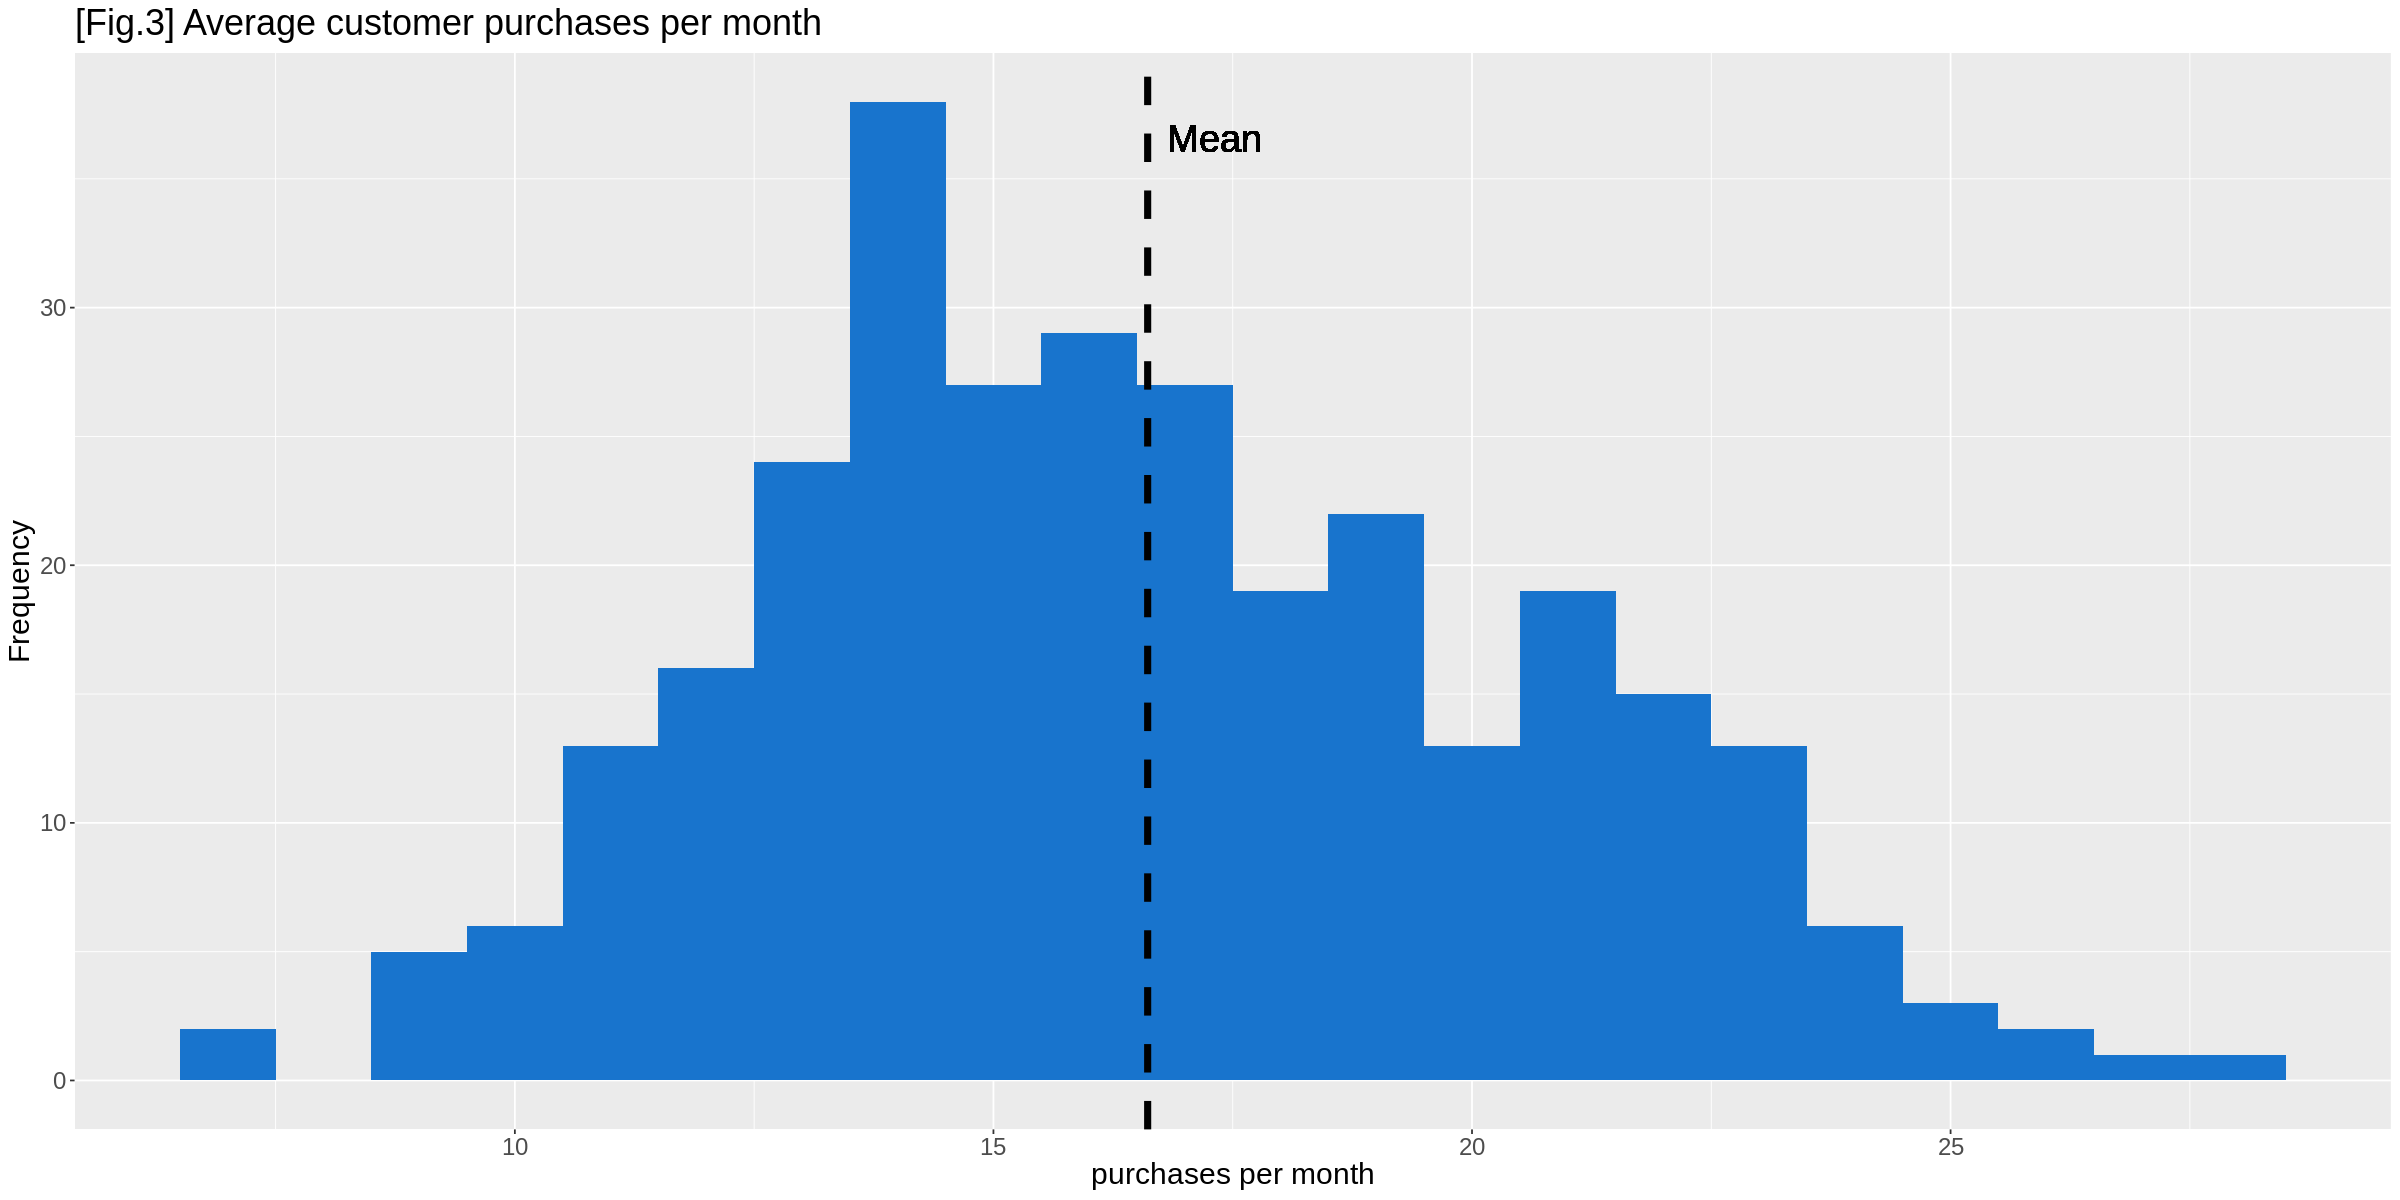

In [ ]:
#Visualizing the distribution of the average purchase order for the month
avg_loyalty <- mean(user_loyalty_per_month$purchases_per_month)
avg_loyalty_plot <- user_loyalty_per_month %>%
  ggplot(aes(x = purchases_per_month)) +
  geom_bar(fill = "dodgerblue3", width = 1) + 
  geom_vline(xintercept = avg_loyalty, linetype="dashed", size = 2) +
  geom_text(aes(avg_loyalty + 0.7, 35,label = "Mean", vjust = -1), size = 8) +
   labs(x = "purchases per month",
        y = "Frequency",
        title = "[Fig.3] Average customer purchases per month") +
   theme(text = element_text(size = 18))
avg_loyalty_plot

In [ ]:
#Calculating the customer lifetime value metric
sprintf("the average customer averages %s purchases this month",
  as.integer(avg_loyalty))
sprintf("The average order value is %s", aov)
customer_lifetime_val <- as.integer(avg_loyalty) * aov * as.integer(time_dur)
sprintf("therefore our CLV metric is %s", customer_lifetime_val )

[1] "the average customer averages 16 purchases this month"

[1] "The average order value is 275.412892696858"

[1] "therefore our CLV metric is 127791.582211342"

<h2> ANSWER 1C </h2>

We see that the average customer makes a purchase of 16 items. Therefore our customer lifetime value (CLV) metric is $127 791.58

<h1> Q2: SQL Queries </h1>

Q1: How many orders were shipped by Speedy Express in total?
> Thought process: 
- From orders, I would like to count all occurrences where speedy express is the shipper. 
This means an intermediate step is needed; we should combine the shippers table with orders.

In [ ]:
#ANSWER 2.A

SELECT 
  COUNT(ShipperName) AS total_orders_speedy_express
FROM Orders
JOIN Shippers 
	ON Orders.ShipperID = Shippers.ShipperID
WHERE ShipperName = 'Speedy Express'

ERROR: ignored

<h2> ANSWER 2.A </h2>

<h3> Final Numerical answer: 54 <h3>

Q: What is the last name of the employee with the most orders?
> Thought process:
- We want to get the employee with the most order. Therefore from the orders set, we must join the employees name to the table or orders. From there we can count the employees based on their orders. Then return the last name of the employee with the largest count.

In [ ]:
SELECT 
  LastName AS Employees_last_name
FROM Orders 
JOIN Employees
  ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY LastName
ORDER BY COUNT(LastName) DESC
LIMIT 1

<h2> ANSWER 2.B </h2>
<h3> Final Answer: 'Peacock' </h3>

Q_C: What product was ordered the most by customers in Germany?
> Thought process:
- This questioned required joining multiple sets. To begin with, we need to see the order details as it contains a quantity. We then combine this set with the orders so that we can connect to the customers table. We will use the customer filter to access customers from Germany strictly. From the count, we then group by the product name and return the product with the largest sum of quantities (i.e the most popular item)

In [ ]:
SELECT 
  ProductName AS Products_most_ordered_product
FROM OrderDetails
JOIN Orders
	ON Orders.OrderID = OrderDetails.OrderID
JOIN Customers
	ON Customers.CustomerID = Orders.CustomerID
JOIN Products
	ON Products.ProductID = OrderDetails.ProductID
WHERE Customers.Country IN ('Germany')
GROUP BY products_most_ordered_product
ORDER BY SUM(Quantity) DESC
LIMIT 1

<h1> ANSWER 2.C </h1>
<h3> Final Answer: 'Boston Crab Meat' </h3>